<a href="https://colab.research.google.com/github/Dee-M123/DM-Project1-Portfolio-HR-Analytics/blob/main/DM-Project1-Portfolio-HR-Analytics%20/Notebooks/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from typing import Dict, Any, List
import seaborn as sns
import matplotlib.pyplot as plt


# **General look at the dataset **

Having a look to see that data is uploaded correctly.

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Dee-M123/DM-Project1-Portfolio-HR-Analytics/refs/heads/main/Data/Uncleaned_employees_final_dataset%20(1).csv")

In [7]:
df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51


In [8]:
df.tail(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17416,64573,HR,region_7,Bachelors,f,referred,1,35,5.0,4,1,0,81


In [9]:
df.shape

(17417, 13)

In [10]:
df.duplicated().sum()

np.int64(2)

In [11]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

# **Data types and null check**

Checking to see what type of data is in each column, and verify any missing data.

In [12]:
df.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [14]:
df.isnull().sum().sort_values(ascending= False)

,0
previous_year_rating,1363
education,771
employee_id,0
region,0
department,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
length_of_service,0


In [15]:
df.isnull().mean().sort_values(ascending= False) * 100 # to have the overall percentage of missing information per column

,0
previous_year_rating,7.825688
education,4.426710
employee_id,0.000000
region,0.000000
department,0.000000
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
length_of_service,0.000000


# **Unique entries**

Looking for unique values per column, this relevant for columns that should have unique IDs

In [16]:
df.nunique().sort_values(ascending=False)

,0
employee_id,17414
avg_training_score,61
age,41
region,34
length_of_service,34
department,9
no_of_trainings,9
previous_year_rating,5
education,3
recruitment_channel,3


In [17]:
df["age"].unique()

array([24, 31, 30, 36, 33, 51, 29, 40, 34, 37, 26, 49, 27, 25, 41, 52, 43,
       35, 42, 57, 46, 21, 32, 28, 38, 23, 58, 54, 44, 48, 45, 39, 59, 53,
       56, 47, 22, 20, 50, 55, 60])

In [18]:
df["length_of_service"].unique()

array([ 1,  5,  4,  9,  7,  2,  3, 11, 12, 10,  6, 14, 18,  8, 26, 13, 22,
       19, 21, 15, 16, 17, 23, 20, 31, 24, 27, 28, 25, 29, 33, 30, 34, 32])

In [19]:
df["avg_training_score"].unique()

array([77, 51, 47, 65, 61, 68, 57, 85, 75, 76, 50, 46, 52, 82, 58, 56, 64,
       80, 83, 62, 87, 55, 88, 90, 66, 45, 54, 84, 59, 49, 81, 79, 78, 60,
       74, 92, 48, 86, 72, 43, 69, 53, 71, 73, 63, 70, 67, 97, 95, 89, 94,
       44, 91, 93, 96, 98, 99, 42, 41, 40, 39])

# **Simple EDA**

**Summary overview of data using a class.**

Looking at both numerical and categorical columns. The aim is to have a good overview the stats in each column to see if anything stands out.

In [20]:
!wget -O eda.py https://raw.githubusercontent.com/Dee-M123/DM-Project1-Portfolio-HR-Analytics/refs/heads/main/src/eda.py

--2025-12-04 09:51:07--  https://raw.githubusercontent.com/Dee-M123/DM-Project1-Portfolio-HR-Analytics/refs/heads/main/src/eda.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2900 (2.8K) [text/plain]
Saving to: ‘eda.py’

eda.py              100%[===================>]   2.83K  --.-KB/s    in 0s      

2025-12-04 09:51:07 (32.9 MB/s) - ‘eda.py’ saved [2900/2900]



In [21]:
class HREDA:
    ...


In [22]:
from importlib import reload
reload(__import__("eda"))
from eda import HREDA

In [23]:
eda = HREDA(df)

In [33]:
# Numeric extra summary
eda.numeric_summary()


,count,mean,std,min,25%,50%,75%,max
employee_id,17417.0,39083.491129,22707.024087,3.0,19281.0,39122.0,58838.0,78295.0
no_of_trainings,17417.0,1.250732,0.595692,1.0,1.0,1.0,1.0,9.0
age,17417.0,34.807774,7.694046,20.0,29.0,33.0,39.0,60.0
previous_year_rating,16054.0,3.345459,1.265386,1.0,3.0,3.0,4.0,5.0
length_of_service,17417.0,5.801860,4.175533,1.0,3.0,5.0,7.0,34.0
KPIs_met_more_than_80,17417.0,0.358845,0.479675,0.0,0.0,0.0,1.0,1.0
awards_won,17417.0,0.023368,0.151074,0.0,0.0,0.0,0.0,1.0
avg_training_score,17417.0,63.176322,13.418179,39.0,51.0,60.0,75.0,99.0


In [34]:
# Distribution stats for a single numeric column
eda.numeric_distribution_stats("avg_training_score")

{'mode': np.int64(50),
 'min': 39,
 'max': 99,
 'q25 (lower)': np.float64(51.0),
 'q50 (median)': np.float64(60.0),
 'q75 (upper)': np.float64(75.0),
 'q90 (top 10%)': np.float64(83.0),
 'q99': np.float64(91.0)}

In [48]:
#summary of numeric columns can be called upon using
per_column_stats = {col: eda.numeric_distribution_stats(col) for col in eda.numeric_col}
#per_column_stats

In [50]:
#making table view of the code above for easier visualisation
numeric_stats_table = pd.DataFrame.from_dict(per_column_stats, orient="index")
numeric_stats_table #make dataframe from dict

numeric_stats_table = numeric_stats_table[
    ["mode", "min", "max", "q25 (lower)", "q50 (median)", "q75 (upper)", "q90 (top 10%)", "q99"]
]
numeric_stats_table

,mode,min,max,q25 (lower),q50 (median),q75 (upper),q90 (top 10%),q99
employee_id,49584.0,3.0,78295.0,19281.0,39122.0,58838.0,70557.8,77523.84
no_of_trainings,1.0,1.0,9.0,1.0,1.0,1.0,2.0,4.00
age,30.0,20.0,60.0,29.0,33.0,39.0,46.0,58.00
previous_year_rating,3.0,1.0,5.0,3.0,3.0,4.0,5.0,5.00
length_of_service,3.0,1.0,34.0,3.0,5.0,7.0,11.0,20.00
KPIs_met_more_than_80,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.00
awards_won,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00
avg_training_score,50.0,39.0,99.0,51.0,60.0,75.0,83.0,91.00


In [36]:
# Categorical summary for one column
eda.summarise_cat("department")

,count,percentage
department,,
Sales & Marketing,5458,31.337199
Operations,3524,20.233106
Procurement,2240,12.860998
Technology,2199,12.625596
Analytics,1697,9.743354
HR,833,4.782684
Finance,802,4.604697
Legal,332,1.906184
R&D,332,1.906184


In [45]:
# Categorical summary of all column
object_summary = eda.cat_summary()
#object_summary

In [46]:
for col, summary in object_summary.items():
    print(f"--- {col.upper()} ---")
    display(summary)

--- DEPARTMENT ---


,count,percentage
department,,
Sales & Marketing,5458,31.337199
Operations,3524,20.233106
Procurement,2240,12.860998
Technology,2199,12.625596
Analytics,1697,9.743354
HR,833,4.782684
Finance,802,4.604697
Legal,332,1.906184
R&D,332,1.906184


--- REGION ---


,count,percentage
region,,
region_2,3918,22.495263
region_22,1990,11.425619
region_7,1488,8.543377
region_13,860,4.937705
region_15,843,4.840099
region_26,748,4.294655
region_31,646,3.709020
region_4,571,3.278406
region_27,516,2.962623


--- EDUCATION ---


,count,percentage
education,,
Bachelors,11519,66.136533
Masters & above,4841,27.794683
NaN,771,4.426710
Below Secondary,286,1.642074


--- GENDER ---


,count,percentage
gender,,
m,12314,70.701039
f,5103,29.298961


--- RECRUITMENT_CHANNEL ---


,count,percentage
recruitment_channel,,
other,9751,55.985531
sourcing,7349,42.194408
referred,317,1.820061


# **Visual exploration**

From the summaries above, the following visual information was interesting to have a look at

The following graph helps paint a visual representation of the number of employees per department, to see how the distribution looks like visually

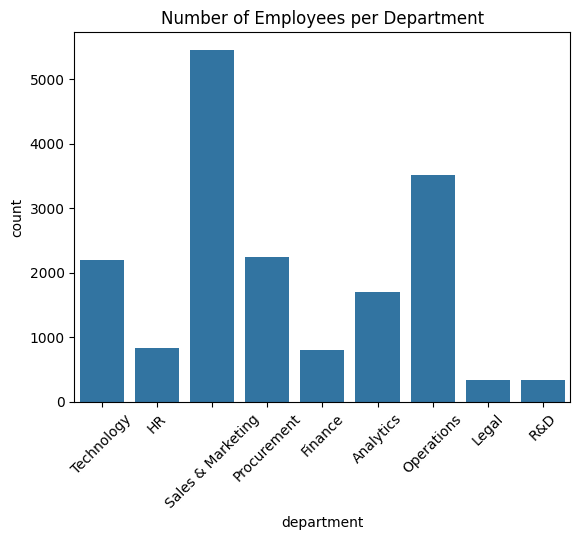

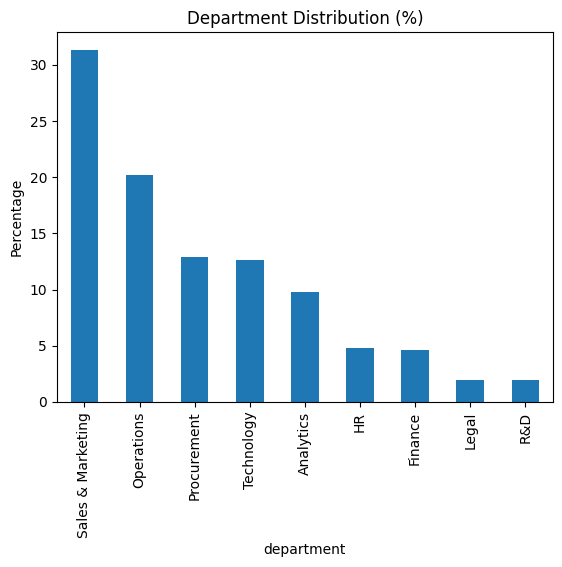

In [53]:

sns.countplot(x="department", data=df)
plt.xticks(rotation=45)
plt.title("Number of Employees per Department")
plt.show()

# Percentage distribution
dept_counts = df["department"].value_counts(normalize=True) * 100
dept_counts.plot(kind="bar")
plt.ylabel("Percentage")
plt.title("Department Distribution (%)")
plt.show()

The interaction between number of trainings and scores

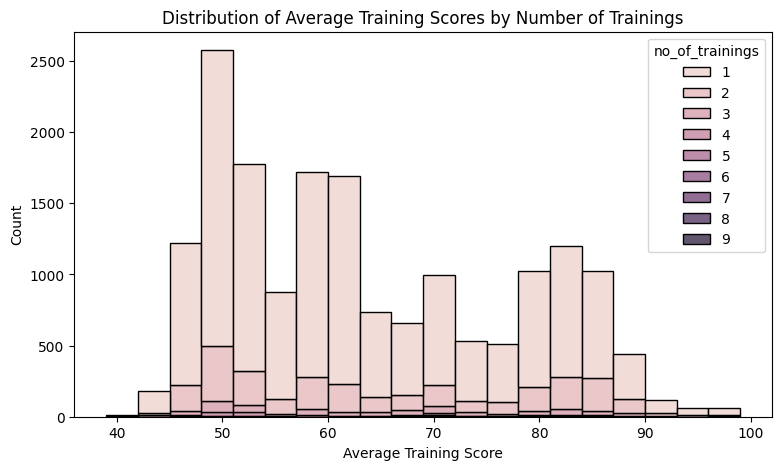

In [59]:


plt.figure(figsize=(9,5))
sns.histplot(data=df, x="avg_training_score", hue="no_of_trainings", multiple="stack", bins=20)
plt.title("Distribution of Average Training Scores by Number of Trainings")
plt.xlabel("Average Training Score")
plt.ylabel("Count")
plt.show()

The number of trainings against KPIs met

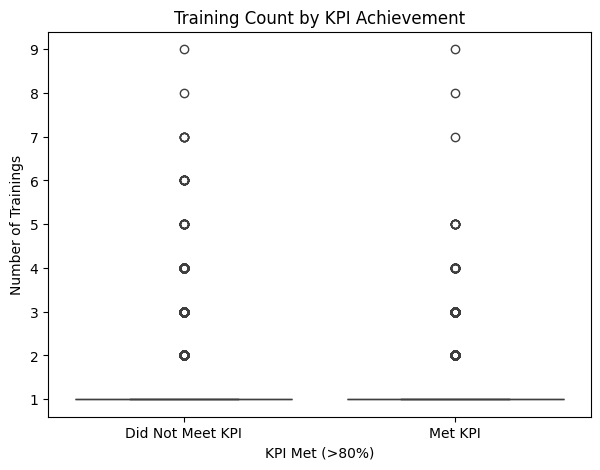

In [54]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x="KPIs_met_more_than_80",
    y="no_of_trainings"
)
plt.title("Training Count by KPI Achievement")
plt.xlabel("KPI Met (>80%)")
plt.ylabel("Number of Trainings")
plt.xticks([0,1], ["Did Not Meet KPI", "Met KPI"])
plt.show()

Taking average training score, we can view distribution among all employees


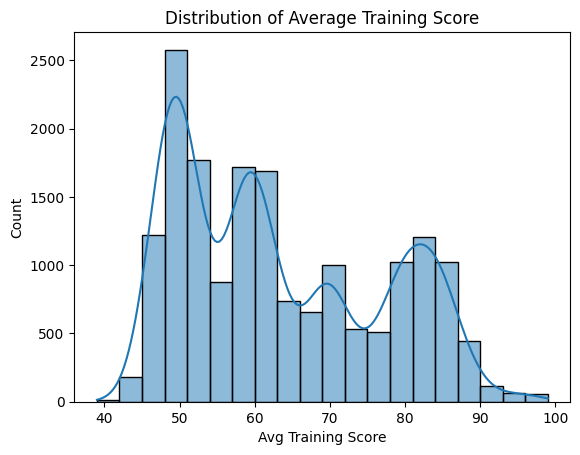

In [30]:

sns.histplot(df["avg_training_score"], bins=20, kde=True)
plt.title("Distribution of Average Training Score")
plt.xlabel("Avg Training Score")
plt.show()

In identifying outliers,the following boxplot can help us identify those.


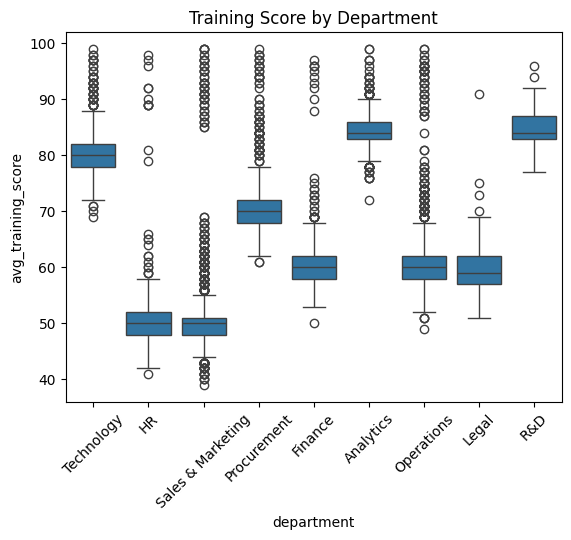

In [31]:

sns.boxplot(x="department", y="avg_training_score", data=df)
plt.xticks(rotation=45)
plt.title("Training Score by Department")
plt.show()

A correlation headmap helps have a summarised visual representation of numerical columns.

This helps build general insights as to what relationships exist across the numeric predictors.

It logical to view this so as to derive exploratory questions in addition to the overviews provided above.


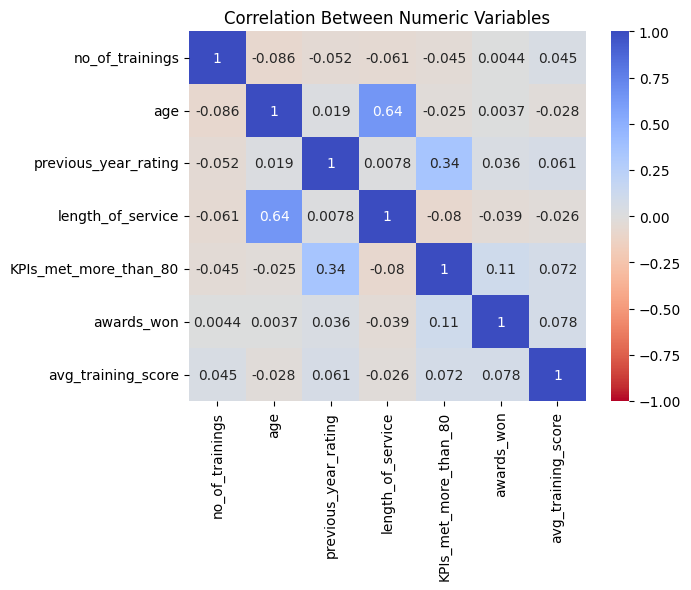

In [60]:

numeric_cols = ["no_of_trainings",
        "age",
        "previous_year_rating",
        "length_of_service",
        "KPIs_met_more_than_80",
        "awards_won",
        "avg_training_score"]
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm_r", vmin= -1, vmax= 1)
plt.title("Correlation Between Numeric Variables")
plt.show()